#### 
NAME  : RAHINI DEVI S
    
ROLLNO: 225229129

##      PDL_LABSHEET-7 (Exploration of DNN design choices using MNIST dataset)

### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras

In [3]:
from keras.datasets import mnist

In [4]:
from keras.utils import to_categorical

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout

In [6]:
from keras import regularizers

In [7]:
from sklearn.model_selection import train_test_split

#### Importing the dataset

In [8]:
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data

11490434/11490434 [==============================] - 3s 0us/step


In [9]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


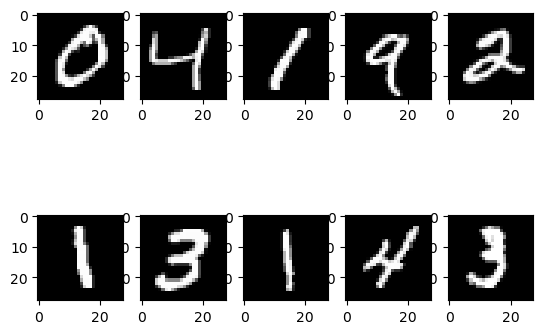

In [10]:
# Printing some training images

for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

#### Flatten the data

In [12]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

#### Normalize the data

In [13]:
X_train = X_train / 255
X_test = X_test / 255

#### EXPLORATION :

In [19]:
def model(nodes, layers, activation_in, activation_out, loss, optimizer, metrics, epochs, X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(nodes, input_dim=28*28, activation=activation_in))
    
    for x in range(layers):
        model.add(Dense(nodes, activation=activation_in))
        model.add(Dense(10, activation=activation_out))
        model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
        model.fit(X_train, to_categorical(y_train), epochs=epochs)
        score = model.evaluate(X_test, to_categorical(y_test))
        print(model.summary(), "\n", "Accuracy =", score[1]*100)

#### 1. Number of Nodes : 
Run neural network with single hidden layer, 32 nodes(with any activation function and any optimizer) for 10 epochs. Change number of nodes as 4, 32, 128, 512, 2056. What is the training and testing accuracies ? Print the number of parameters of the model and training time for each of these configrations.

In [20]:
model1 = model(4, 0, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

#### 2. Number of Layers :
Run neural network with 3 hidden layer, 32 nodes each(with any activation function and any optimizer)
for 10 epochs. Change number of layers as 4, 6, 8, 16. What is the training and testing accuracies ? 
Print the number of parameters of the model and training time for each of these configurations. Run
the same models for 30 epochs. Any changes ?

In [21]:
model7 = model(32, 3, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1576 - accuracy: 0.6407
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5671 - accuracy: 0.8276
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4787 - accuracy: 0.8581
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4207 - accuracy: 0.8779
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3811 - accuracy: 0.8893
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3552 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3366 - accuracy: 0.9025
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3222 - accuracy: 0.9065
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3103 - accuracy: 0.9100
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2964 

#### 3. Activation function :
Run neural network with 3 hidden layer, 32 nodes each(with any optimizer) with sigmoid activation 
function for all layers, for 10 epochs. Change only the activation function as tanh, relu(for all 3 
layers) etc. What is the training and testing accuracies ? Run the same models for 30 epochs. Any changes ?

In [22]:
model3 = model(32, 2, 'sigmoid','softmax','categorical_crossentropy','Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.2759 - accuracy: 0.1711
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7391 - accuracy: 0.4577
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 1.1012 - accuracy: 0.6631
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8329 - accuracy: 0.7430
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7067 - accuracy: 0.7793
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6397 - accuracy: 0.7994
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5945 - accuracy: 0.8152
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5586 - accuracy: 0.8268
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5273 - accuracy: 0.8400
Epoch 10/10
313/313 [==============================] - 2s 3ms/step - loss: 0.4746

#### 4. Activation function combinations :
For the three layers use different combinations of activation functions such as layer 1 : sigmoid, layer 2 : relu, layer 3 :
tanh. There can be lot of combinations like this. Which one is the best for 3 layer each with 32 node architecture ?

In [23]:
def model_afc(activation1, activation2, activation3):
    model = Sequential()
    model.add(Dense(32, input_dim=28*28, activation=activation1))
    model.add(Dense(32, activation=activation2))
    model.add(Dense(32, activation=activation2))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')
    model.fit(X_train, to_categorical(y_train), epochs=10)
    score = model.evaluate(X_test, to_categorical(y_test))
    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [24]:
model4 = model_afc('sigmoid','relu','tanh')

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 1.8038 - accuracy: 0.3496
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8875 - accuracy: 0.6865
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7659 - accuracy: 0.7367
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7224 - accuracy: 0.7577
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6928 - accuracy: 0.7702
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6723 - accuracy: 0.7807
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6547 - accuracy: 0.7890
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6331 - accuracy: 0.7972
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6125 - accuracy: 0.8086
Epoch 10/10
313/313 [==============================] - 2s 3ms/step - loss: 0.563

#### 5. Layer-node combinations
Run different models mimicking the following structures. Which one gives best accuracy ? Print the number of parameters of the
model and training time for each of these configurations.

In [25]:
model5 = model(32, 1, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.1811 - accuracy: 0.6179
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6736 - accuracy: 0.7838
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5645 - accuracy: 0.8252
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4794 - accuracy: 0.8568
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4185 - accuracy: 0.8771
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3835 - accuracy: 0.8873
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3596 - accuracy: 0.8939
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3395 - accuracy: 0.9015
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3230 - accuracy: 0.9048
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.3021

#### 6. Optimizer :
Run neural network with 3 hidden layer, 32 nodea each with SGD optimizer with relu activation function for all layers, for 10 
epochs. Run the same model with optimizers such as Momentum, RMSProp, Adam etc. Which one gives good accuracy for 10 epochs ?

In [26]:
def model_opt(optimizer):
    model = Sequential()
    model.add(Dense(32, input_dim=28*28, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')
    model.fit(X_train, to_categorical(y_train), epochs=10)
    score = model.evaluate(X_test, to_categorical(y_test))
    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [27]:
model6 = model_opt('SGD')

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3009 - accuracy: 0.1131
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3003 - accuracy: 0.1128
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3000 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2997 - accuracy: 0.1138
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2995 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2990 - accuracy: 0.1142
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2985 - accuracy: 0.1126
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2981 - accuracy: 0.1161
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2974 - accuracy: 0.1165
Epoch 10/10
313/313 [==============================] - 2s 3ms/step - loss: 2.2956 

#### 7. L1, L2 Reguralization :
Run neural network with 3 hidden layers, 128 nodes each (with any optimizer) with relu activation for all layers. for 10 epochs.
Add L1 reularization to each layer and see the change in the training and testing accuracies. Change in the Lambda parameters in
L1 regularization with smaller and bigger numbers and see the change in accuracies. Instead of L1, now do it with L2. What is the
effect ?

In [28]:
def model_reg(reg):
    model = Sequential()
    model.add(Dense(128, input_dim=28*28, activation='relu', kernel_regularizer=reg))
    model.add(Dense(128, activation='relu', kernel_regularizer=reg))
    model.add(Dense(128, activation='relu', kernel_regularizer=reg))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')
    model.fit(X_train, to_categorical(y_train), epochs=10)
    score = model.evaluate(X_test, to_categorical(y_test))
    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [29]:
model7 = model_reg(regularizers.l1(0.01))

Epoch 1/10
1875/1875 [==============================] - 20s 8ms/step - loss: 3.7755 - accuracy: 0.1120
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.4682 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 2.4681 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.4680 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 2.4680 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.4679 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.4678 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 2.4679 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.4678 - accuracy: 0.1124
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - los

In [30]:
model7 = model_reg(regularizers.l1(0.01))

Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 3.7797 - accuracy: 0.1117
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.4680 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.4680 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.4680 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.4679 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 2.4679 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.4679 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.4678 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.4679 - accuracy: 0.1124
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - los

#### 8. Dropout Regularization :
Run neural network with 3 hidden layers, 128 nodes each (with any optimizer) with relu activation for all layers. for 10 epochs.
Add dropout layer in between the hidden layers and see the change in the training and testing accuracies. Change in the 
dropout rate in layers with smaller and bigger numbers and see the change in accuracies.   

In [31]:
def model_dropout(rate):
    model = Sequential()
    model.add(Dense(128, input_dim=28*28, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')
    model.fit(X_train, to_categorical(y_train), epochs=10)
    score = model.evaluate(X_test, to_categorical(y_test))
    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [32]:
model8 = model_dropout(0.5)

Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 1.1405 - accuracy: 0.5922
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6163 - accuracy: 0.8155
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5154 - accuracy: 0.8520
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4619 - accuracy: 0.8691
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4276 - accuracy: 0.8797
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4029 - accuracy: 0.8863
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3858 - accuracy: 0.8914
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3747 - accuracy: 0.8951
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3618 - accuracy: 0.8984
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

#### 9. Input Size :
Run neural networks with 3 hidden layer, 128 nodes each (with any optimizer) with relu activation function for all layers, for 
10 epochs. Instead of 28*28 now run different model with digit imagesin 56*56, 112*112 and 224*224 sizes. Print how the model
size and accuracies model ?

In [33]:
def model_input_dim(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')
    model.fit(X_train, to_categorical(y_train), epochs=10)
    score = model.evaluate(X_test, to_categorical(y_test))
    print(model.summary(), "\n", "Accuracy =", score[1]*100)

#### 10. Dataset split :
Instead of 60k images of training and 10k images for testing, run different models with different models with different training
and testing sizes, and see the changes in the accuracies.

In [34]:
(X_train, y_train), (X_test, y_test) = data
X1 = np.concatenate((X_train, X_test))
y1 = np.concatenate((y_train, y_test))

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.7, random_state=42)

In [35]:
model9 = Sequential([Dense(32, input_dim=28*28, activation='relu'), 
                      Dense(32, activation='relu'), 
                      Dense(32, activation='relu'), 
                      Dense(10, activation='softmax')]) 
model9.compile(loss='mean_squared_error', optimizer='Adam', metrics='accuracy')
model9.fit(X_train1, y_train1, epochs=10) 
score1 = model9.evaluate(X_test1, y_test1)
print(model9.summary(), "\n", "Accuracy =", score1[1]*100)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\visit\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\visit\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\visit\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\visit\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\visit\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\visit\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)
